In [12]:
#Llamar al dataloader
%run DataLoader.ipynb
!pip install langdetect


In [24]:
!pip install pycountry

     |████████████████████████████████| 10.0 MB 3.9 MB/s eta 0:00:01    |███████████▍                    | 3.6 MB 1.9 MB/s eta 0:00:04
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=530cf9994c723e265fd5182bb12fc51fa2b503df46a27c527ed5aae30a80c99d
  Stored in directory: /home/celeste/.cache/pip/wheels/00/77/65/5f318c3c30b046b450a385ecfc690125f8a270cdb0f3f483b4
Successfully built pycountry


In [25]:
from langdetect import detect
import pycountry

In [4]:
dataset.head(5)

,keyword,location,text,target,longitud
id,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38
5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88


In [5]:
detect("Ein, zwei, drei, vier")


'de'

In [27]:
dataset_test = dataset
dataset_test['Idioma'] = dataset_test.text.apply(lambda x : pycountry.languages.get(alpha_2=detect(x)).name)
dataset_test

,keyword,location,text,target,longitud,Idioma
id,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69,English
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38,English
5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133,English
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65,English
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88,English
...,...,...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,True,83,English
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,True,125,English
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,True,65,English


'Spanish'

In [28]:
dataset_test[['text','Idioma']]

,text,Idioma
id,,
1,Our Deeds are the Reason of this #earthquake M...,English
4,Forest fire near La Ronge Sask. Canada,English
5,All residents asked to 'shelter in place' are ...,English
6,"13,000 people receive #wildfires evacuation or...",English
7,Just got sent this photo from Ruby #Alaska as ...,English
...,...,...
10869,Two giant cranes holding a bridge collapse int...,English
10870,@aria_ahrary @TheTawniest The out of control w...,English
10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,English


In [29]:
language_count = dataset_test.groupby('Idioma').agg({'target':'count'}).reset_index()
language_count.columns= ['Idioma','Cantidad']
language_count.nlargest(10,'Cantidad')

,Idioma,Cantidad
6,English,7308
10,German,61
2,Catalan,24
0,Afrikaans,22
4,Danish,22
12,Italian,21
9,French,19
13,Norwegian,17
5,Dutch,13
7,Estonian,12


Text(0.5, 1.0, 'Análisis del los idiomas más frecuentes')

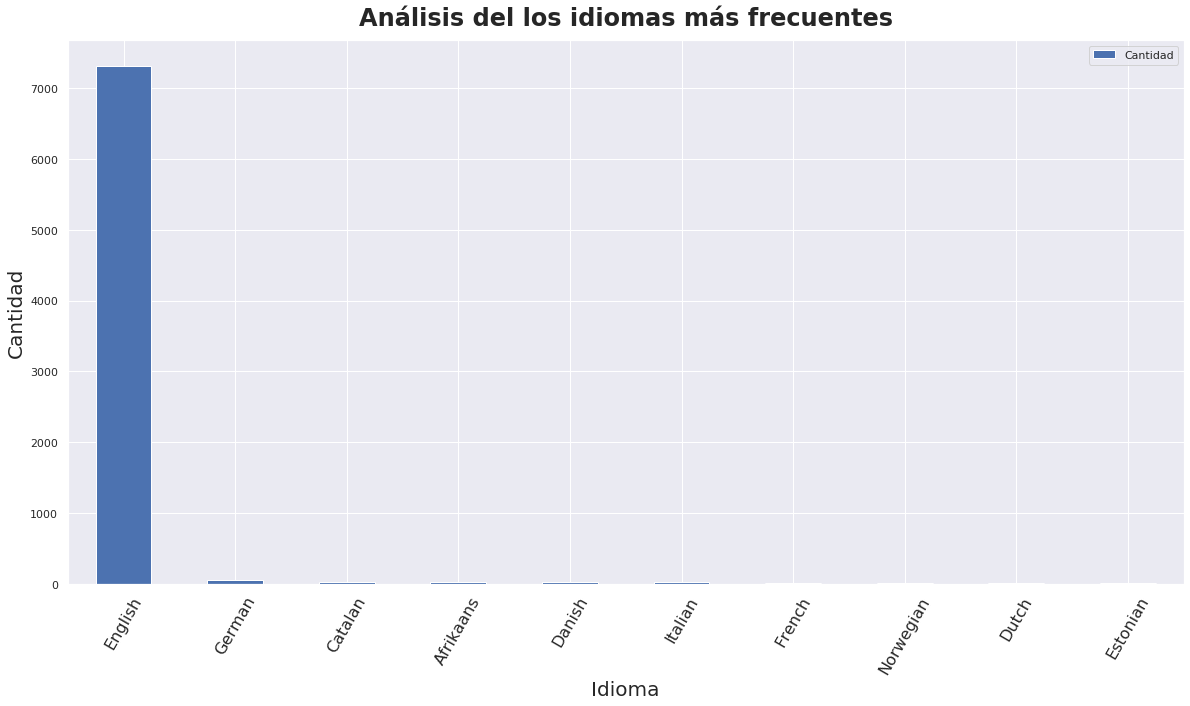

In [30]:
fig, ax = plt.subplots()

language_count.nlargest(10,'Cantidad').plot(kind='bar', x = 'Idioma', ax = ax)

plt.xlabel("Idioma",fontsize=20)
plt.ylabel('Cantidad',fontsize=20)
plt.xticks(fontsize=16,rotation = 60) 
plt.title('Análisis del los idiomas más frecuentes',fontsize=24,fontweight='bold', pad = 15)

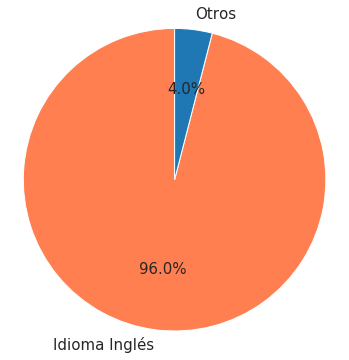

In [32]:
en_count = language_count.loc[language_count['Idioma']=='English','Cantidad']
others_count  = language_count.loc[language_count['Idioma']!='English','Cantidad'].sum()


labels = 'Idioma Inglés', 'Otros'
sizes = [en_count, others_count]
colors = ('coral','#1f77b4' )

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'fontsize': 15}, colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()